In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-03-29 18:57:07.716483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock,period="60d", interval="5m")
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-03 09:30:00-05:00,184.220001,185.688705,183.860001,185.630005,185.630005,4199190,APPLE
2024-01-03 09:35:00-05:00,185.639893,185.880005,184.949997,185.029999,185.029999,1709860,APPLE
2024-01-03 09:40:00-05:00,185.035004,185.190002,184.710007,184.820007,184.820007,1100128,APPLE
2024-01-03 09:45:00-05:00,184.820007,185.220001,184.690002,185.169998,185.169998,1104979,APPLE
2024-01-03 09:50:00-05:00,185.169998,185.350006,184.949997,185.044998,185.044998,917856,APPLE
...,...,...,...,...,...,...,...
2024-03-28 15:35:00-04:00,176.139999,176.304993,175.850006,175.960007,175.960007,159264,GENERAL_ELC
2024-03-28 15:40:00-04:00,175.959396,176.205002,175.889999,176.123505,176.123505,105739,GENERAL_ELC
2024-03-28 15:45:00-04:00,176.139999,176.210007,175.860001,176.139999,176.139999,182872,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-01-03 09:30:00-05:00,184.220001,185.688705,183.860001,185.630005,185.630005,4199190,APPLE
1,2024-01-03 09:35:00-05:00,185.639893,185.880005,184.949997,185.029999,185.029999,1709860,APPLE
2,2024-01-03 09:40:00-05:00,185.035004,185.190002,184.710007,184.820007,184.820007,1100128,APPLE
3,2024-01-03 09:45:00-05:00,184.820007,185.220001,184.690002,185.169998,185.169998,1104979,APPLE
4,2024-01-03 09:50:00-05:00,185.169998,185.350006,184.949997,185.044998,185.044998,917856,APPLE
...,...,...,...,...,...,...,...,...
46742,2024-03-28 15:35:00-04:00,176.139999,176.304993,175.850006,175.960007,175.960007,159264,GENERAL_ELC
46743,2024-03-28 15:40:00-04:00,175.959396,176.205002,175.889999,176.123505,176.123505,105739,GENERAL_ELC
46744,2024-03-28 15:45:00-04:00,176.139999,176.210007,175.860001,176.139999,176.139999,182872,GENERAL_ELC
46745,2024-03-28 15:50:00-04:00,176.119995,176.119995,175.710007,176.100006,176.100006,220176,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-03 09:30:00-05:00,184.220001,185.688705,183.860001,185.630005,185.630005,4199190,APPLE
2024-01-03 09:35:00-05:00,185.639893,185.880005,184.949997,185.029999,185.029999,1709860,APPLE
2024-01-03 09:40:00-05:00,185.035004,185.190002,184.710007,184.820007,184.820007,1100128,APPLE
2024-01-03 09:45:00-05:00,184.820007,185.220001,184.690002,185.169998,185.169998,1104979,APPLE
2024-01-03 09:50:00-05:00,185.169998,185.350006,184.949997,185.044998,185.044998,917856,APPLE
...,...,...,...,...,...,...,...
2024-03-28 15:35:00-04:00,176.139999,176.304993,175.850006,175.960007,175.960007,159264,GENERAL_ELC
2024-03-28 15:40:00-04:00,175.959396,176.205002,175.889999,176.123505,176.123505,105739,GENERAL_ELC
2024-03-28 15:45:00-04:00,176.139999,176.210007,175.860001,176.139999,176.139999,182872,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2024-01-03 09:30:00-05:00,185.630005
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998
2024-01-03 09:50:00-05:00,185.044998
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

39972

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.4532498 ],
       [-0.45519365],
       [-0.45587396],
       ...,
       [-0.4839947 ],
       [-0.48412426],
       [-0.48623011]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train

[array([-0.4532498 , -0.45519365, -0.45587396, -0.45474009, -0.45514505,
        -0.45603566, -0.45587396, -0.45736005, -0.45867312, -0.45880595,
        -0.45934048, -0.45866437, -0.45878973, -0.45924329, -0.45908129,
        -0.46005322, -0.45921091, -0.45898411, -0.45819039, -0.45846574,
        -0.45855843, -0.45853055, -0.45875735, -0.45788262, -0.45788262,
        -0.45833617, -0.458919  , -0.45971534, -0.45977782, -0.46011803,
        -0.45950247, -0.45943766, -0.45959966, -0.45924329, -0.45932426,
        -0.45875735, -0.45853055, -0.45830374, -0.4581418 , -0.45780743,
        -0.45780159, -0.45744522, -0.45713814, -0.4575259 , -0.4572985 ,
        -0.45695929, -0.45700106, -0.45699784, -0.45705647, -0.45710507,
        -0.45733217, -0.45789878, -0.45757647, -0.45733187, -0.45843336,
        -0.45755862, -0.45752625, -0.45734804, -0.45705647, -0.45613314]),
 array([-0.45519365, -0.45587396, -0.45474009, -0.45514505, -0.45603566,
        -0.45587396, -0.45736005, -0.45867312, -0

In [20]:
y_train

[-0.45645713406917254,
 -0.45627086638421244,
 -0.4557120138952332,
 -0.45623033042304806,
 -0.4565546675464619,
 -0.45642505133893396,
 -0.4565219421729365,
 -0.4571212811889811,
 -0.45681350448872593,
 -0.45705647308521713,
 -0.4575910534315968,
 -0.45726706234687586,
 -0.4570652229207367,
 -0.4571698749082793,
 -0.4578340220280879,
 -0.45770440582055993,
 -0.4584009817093,
 -0.4577206202050257,
 -0.46245091970241037,
 -0.46267737730984193,
 -0.4648123371766296,
 -0.4660304922437173,
 -0.46541493884320695,
 -0.46669429332483303,
 -0.465987385709406,
 -0.46484797916199494,
 -0.46517197024671575,
 -0.4655607200011017,
 -0.4661600590171463,
 -0.46604670662818304,
 -0.4676827281339564,
 -0.46769894251842214,
 -0.4673587864833345,
 -0.4662086527364445,
 -0.4660304922437173,
 -0.46666221059459445,
 -0.4657550948782947,
 -0.4650261890888211,
 -0.4642162608111178,
 -0.464588796181038,
 -0.46424864014595024,
 -0.46460501056550374,
 -0.4643134482497143,
 -0.464200046426652,
 -0.464605010565503

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape[1]

60

In [23]:
x_train

array([[[-0.4532498 ],
        [-0.45519365],
        [-0.45587396],
        ...,
        [-0.45734804],
        [-0.45705647],
        [-0.45613314]],

       [[-0.45519365],
        [-0.45587396],
        [-0.45474009],
        ...,
        [-0.45705647],
        [-0.45613314],
        [-0.45645713]],

       [[-0.45587396],
        [-0.45474009],
        [-0.45514505],
        ...,
        [-0.45613314],
        [-0.45645713],
        [-0.45627087]],

       ...,

       [[-0.57143457],
        [-0.57172613],
        [-0.57188813],
        ...,
        [-0.57514401],
        [-0.57467428],
        [-0.57311919]],

       [[-0.57172613],
        [-0.57188813],
        [-0.57172935],
        ...,
        [-0.57467428],
        [-0.57311919],
        [-0.57315161]],

       [[-0.57188813],
        [-0.57172935],
        [-0.57159652],
        ...,
        [-0.57311919],
        [-0.57315161],
        [-0.57447986]]])

In [24]:
y_train.shape[0]

39912

In [25]:
y_train

array([-0.45645713, -0.45627087, -0.45571201, ..., -0.57315161,
       -0.57447986, -0.57499793])

In [26]:
x_train.shape

(39912, 60, 1)

In [27]:
com='META'
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-03 09:30:00-05:00,344.980011,346.510010,343.174988,346.429993,346.429993,772610,META
2024-01-03 09:35:00-05:00,346.440094,347.100006,344.209991,344.859589,344.859589,352269,META
2024-01-03 09:40:00-05:00,345.000000,347.529999,344.799988,347.140015,347.140015,290212,META
2024-01-03 09:45:00-05:00,347.179993,347.950012,346.190002,346.890015,346.890015,387149,META
2024-01-03 09:50:00-05:00,346.910004,347.015015,345.890015,346.380005,346.380005,248409,META
...,...,...,...,...,...,...,...
2024-03-28 15:35:00-04:00,488.750000,488.820007,488.130005,488.369995,488.369995,129549,META
2024-03-28 15:40:00-04:00,488.442993,488.648590,487.920013,488.230011,488.230011,168560,META
2024-03-28 15:45:00-04:00,488.200012,488.709991,488.089996,488.220001,488.220001,184603,META


In [28]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [29]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [30]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

In [32]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

400/400 [==============================] - 0s 598us/step - loss: 0.3094


In [35]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [36]:
dataset

,Close
Datetime,
2024-01-03 09:30:00-05:00,185.630005
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998
2024-01-03 09:50:00-05:00,185.044998
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [37]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2024-02-21 09:45:00-05:00,148.059402
2024-02-21 09:50:00-05:00,148.380005
2024-02-21 09:55:00-05:00,148.850006
2024-02-21 10:00:00-05:00,149.084396
2024-02-21 10:05:00-05:00,149.320007
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [38]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [39]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

66/66 [==============================] - 0s 476us/step


array([[0.0001144 ],
       [0.00011441],
       [0.00011425],
       ...,
       [0.00039407],
       [0.00039405],
       [0.00039501]], dtype=float32)

In [40]:
len(predictions)

2103

In [41]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [42]:
predictions = scaler.inverse_transform(predictions)

In [43]:
mse = np.mean(predictions -f_app)
mse

-19.778666623926135

In [44]:
predictions

array([[325.5696 ],
       [325.5696 ],
       [325.56958],
       ...,
       [325.6559 ],
       [325.6559 ],
       [325.65622]], dtype=float32)

In [45]:
    import random
    random.random()

0.041262883176344856

In [46]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [47]:
    Final_pred

array([[321.77823],
       [321.77823],
       [321.7782 ],
       ...,
       [321.86453],
       [321.86453],
       [321.86484]], dtype=float32)

In [48]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

4672

In [49]:
    len(data[138:252])

114

In [50]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [51]:
    valid

,Close_app,Predictions
0,346.429993,321.778229
1,344.859589,321.778229
2,347.140015,321.778198
3,346.890015,321.778198
4,346.380005,321.778198
...,...,...
2098,469.119995,321.864532
2099,468.950012,321.864532
2100,468.894989,321.864532
2101,468.410004,321.864532


In [52]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-01-03 09:30:00-05:00,184.220001,185.688705,183.860001,185.630005,185.630005,4199190,APPLE
1,2024-01-03 09:35:00-05:00,185.639893,185.880005,184.949997,185.029999,185.029999,1709860,APPLE
2,2024-01-03 09:40:00-05:00,185.035004,185.190002,184.710007,184.820007,184.820007,1100128,APPLE
3,2024-01-03 09:45:00-05:00,184.820007,185.220001,184.690002,185.169998,185.169998,1104979,APPLE
4,2024-01-03 09:50:00-05:00,185.169998,185.350006,184.949997,185.044998,185.044998,917856,APPLE
...,...,...,...,...,...,...,...,...
46742,2024-03-28 15:35:00-04:00,176.139999,176.304993,175.850006,175.960007,175.960007,159264,GENERAL_ELC
46743,2024-03-28 15:40:00-04:00,175.959396,176.205002,175.889999,176.123505,176.123505,105739,GENERAL_ELC
46744,2024-03-28 15:45:00-04:00,176.139999,176.210007,175.860001,176.139999,176.139999,182872,GENERAL_ELC
46745,2024-03-28 15:50:00-04:00,176.119995,176.119995,175.710007,176.100006,176.100006,220176,GENERAL_ELC


In [53]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2024-01-03 09:30:00-05:00,185.630005
1,2024-01-03 09:35:00-05:00,185.029999
2,2024-01-03 09:40:00-05:00,184.820007
3,2024-01-03 09:45:00-05:00,185.169998
4,2024-01-03 09:50:00-05:00,185.044998
...,...,...
46742,2024-03-28 15:35:00-04:00,175.960007
46743,2024-03-28 15:40:00-04:00,176.123505
46744,2024-03-28 15:45:00-04:00,176.139999
46745,2024-03-28 15:50:00-04:00,176.100006


In [54]:
    dfxf['Datetime']

0        2024-01-03 09:30:00-05:00
1        2024-01-03 09:35:00-05:00
2        2024-01-03 09:40:00-05:00
3        2024-01-03 09:45:00-05:00
4        2024-01-03 09:50:00-05:00
                   ...            
46742    2024-03-28 15:35:00-04:00
46743    2024-03-28 15:40:00-04:00
46744    2024-03-28 15:45:00-04:00
46745    2024-03-28 15:50:00-04:00
46746    2024-03-28 15:55:00-04:00
Name: Datetime, Length: 46747, dtype: object

In [55]:
    import datetime
    def str_to_datetime(s):
      split = s.split('-')
      year, month, day = int(split[0]), int(split[1]), int(split[2])
      return datetime.datetime(year=year, month=month, day=day)
    datetime_object = str_to_datetime('1986-03-19')
    datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [56]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2024-01-03 09:30:00-05:00,185.630005
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998
2024-01-03 09:50:00-05:00,185.044998
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [57]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

In [58]:
    import matplotlib.pyplot as plt

    # plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    # plt.legend('APPLE')
    # plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    # plt.legend('GOOGLE')
    # plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    # plt.legend('MICROSOFT')
    # plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    # plt.legend('AMAZON')
    # plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    # plt.legend('META')
    # plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    # plt.legend('NETFLIX')
    # plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    # plt.legend('AMERICAN EXPR')
    # plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    # plt.legend('JP-MORGAN')
    # plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    # plt.legend('TESLA')
    # plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    # plt.legend('GENERAL-ELC')

In [59]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-03 09:30:00-05:00,344.980011,346.510010,343.174988,346.429993,346.429993,772610,META
2024-01-03 09:35:00-05:00,346.440094,347.100006,344.209991,344.859589,344.859589,352269,META
2024-01-03 09:40:00-05:00,345.000000,347.529999,344.799988,347.140015,347.140015,290212,META
2024-01-03 09:45:00-05:00,347.179993,347.950012,346.190002,346.890015,346.890015,387149,META
2024-01-03 09:50:00-05:00,346.910004,347.015015,345.890015,346.380005,346.380005,248409,META
...,...,...,...,...,...,...,...
2024-03-28 15:35:00-04:00,488.750000,488.820007,488.130005,488.369995,488.369995,129549,META
2024-03-28 15:40:00-04:00,488.442993,488.648590,487.920013,488.230011,488.230011,168560,META
2024-03-28 15:45:00-04:00,488.200012,488.709991,488.089996,488.220001,488.220001,184603,META


In [60]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [61]:
    df_app_c

,Close
Datetime,
2024-01-03 09:30:00-05:00,346.429993
2024-01-03 09:35:00-05:00,344.859589
2024-01-03 09:40:00-05:00,347.140015
2024-01-03 09:45:00-05:00,346.890015
2024-01-03 09:50:00-05:00,346.380005
...,...
2024-03-28 15:35:00-04:00,488.369995
2024-03-28 15:40:00-04:00,488.230011
2024-03-28 15:45:00-04:00,488.220001


In [62]:
    dfxfs

,Close
Datetime,
2024-01-03 09:30:00-05:00,185.630005
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998
2024-01-03 09:50:00-05:00,185.044998
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [63]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2024-01-03 09:30:00-05:00,346.429993
2024-01-03 09:35:00-05:00,344.859589
2024-01-03 09:40:00-05:00,347.140015
2024-01-03 09:45:00-05:00,346.890015
2024-01-03 09:50:00-05:00,346.380005
...,...
2024-03-28 15:35:00-04:00,488.369995
2024-03-28 15:40:00-04:00,488.230011
2024-03-28 15:45:00-04:00,488.220001


In [64]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2024-01-03 09:30:00-05:00,346.429993
2024-01-03 09:35:00-05:00,344.859589
2024-01-03 09:40:00-05:00,347.140015
2024-01-03 09:45:00-05:00,346.890015
2024-01-03 09:50:00-05:00,346.380005
...,...
2024-03-28 15:35:00-04:00,488.369995
2024-03-28 15:40:00-04:00,488.230011
2024-03-28 15:45:00-04:00,488.220001


In [65]:
    dfxfs

,Close
Datetime,
2024-01-03 09:30:00-05:00,185.630005
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998
2024-01-03 09:50:00-05:00,185.044998
...,...
2024-03-28 15:35:00-04:00,175.960007
2024-03-28 15:40:00-04:00,176.123505
2024-03-28 15:45:00-04:00,176.139999


In [66]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([346.42999268, 344.85958862, 347.14001465, ..., 488.22000122,
       487.17001343, 485.48999023])

In [67]:
    fcv = np.array(dfxfs['Close'])

In [68]:
    len(fcv)

46747

In [69]:
    len(fxc['Close'])

46720

In [70]:
    mseallfe = np.zeros(len(dfxfs))

In [71]:
    dfxfs[1:4]

,Close
Datetime,
2024-01-03 09:35:00-05:00,185.029999
2024-01-03 09:40:00-05:00,184.820007
2024-01-03 09:45:00-05:00,185.169998


In [72]:
len(mseallfe)

46747

In [73]:
fcv.shape

(46747,)

In [74]:
    for i in range(0,len(fxv)):
        mseallfe[i] = fcv[i]-fxv[i]

In [75]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

46747

In [76]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

46747

In [77]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [78]:
    len(final_df)

46747

In [79]:
    len(mseallfe)

46747

In [80]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([346.42999268, 344.85958862, 347.14001465, ..., 176.13999939,
       176.1000061 , 175.44999695])

In [81]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,346.429993
1,344.859589
2,347.140015
3,346.890015
4,346.380005
...,...
46742,175.960007
46743,176.123505
46744,176.139999
46745,176.100006


In [82]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [83]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [84]:
    datasetx

,Close
1746,462.399902
1747,462.524994
1748,462.829987
1749,462.684998
1750,462.929993
...,...
15700,479.279907
15701,476.880005
15702,476.130005
15703,477.989990


In [85]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[0.32484817],
       [0.32624459],
       [0.32964928],
       ...,
       [0.47812013],
       [0.49888353],
       [0.49977677]])

In [86]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([0.32484817, 0.32624459, 0.32964928, 0.32803074, 0.33076567,
       0.32964928, 0.33238456, 0.34271039, 0.33846831, 0.33975197,
       0.33049347, 0.32496093, 0.33065427, 0.32864464, 0.32406768,
       0.31620901, 0.30531358, 0.30380678, 0.31089518, 0.31100692,
       0.31424435, 0.31201157, 0.31586289, 0.31904444, 0.32127041,
       0.32545218, 0.32116548, 0.32049571, 0.32535168, 0.32473779,
       0.33054253, 0.33802169, 0.35564169, 0.36961375, 0.39231865,
       0.38836786, 0.37273944, 0.35967834, 0.34672898, 0.34957565,
       0.34530257, 0.36269262, 0.34862687, 0.33355784, 0.33104469,
       0.31469063, 0.31357458, 0.29113643, 0.35677613, 0.34429554,
       0.33824517, 0.33154718, 0.31033716, 0.27740556, 0.253293  ,
       0.2505022 , 0.24681849, 0.25500318, 0.23777734, 0.25251183])]
[0.2538513622275991]

[array([0.32484817, 0.32624459, 0.32964928, 0.32803074, 0.33076567,
       0.32964928, 0.33238456, 0.34271039, 0.33846831, 0.33975197,
       0.33049347, 0.32496093, 0.330

In [87]:
    len(x_trainx)

13202

In [88]:
    sdx

,Close
0,346.429993
1,344.859589
2,347.140015
3,346.890015
4,346.380005
...,...
46742,175.960007
46743,176.123505
46744,176.139999
46745,176.100006


In [89]:
    x_trainx.shape[0]

13202

In [90]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [91]:
    xtrainfinal.shape[0]

46747

In [92]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [93]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [95]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 677us/step - loss: 0.1604


In [96]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [97]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,382.774902
15009,382.170013
15010,381.746613
15011,381.679993
15012,381.690002
...,...
15700,479.279907
15701,476.880005
15702,476.130005
15703,477.989990


In [98]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [99]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 557us/step


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [100]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [101]:
    predictionsx

array([[433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],
       [433.3    ],


In [102]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

46747

In [103]:
    data

0        346.429993
1        344.859589
2        347.140015
3        346.890015
4        346.380005
            ...    
46742    175.960007
46743    176.123505
46744    176.139999
46745    176.100006
46746    175.449997
Name: Close, Length: 46747, dtype: float64

In [104]:
    datax = pd.DataFrame(data)
    datax

,Close
0,346.429993
1,344.859589
2,347.140015
3,346.890015
4,346.380005
...,...
46742,175.960007
46743,176.123505
46744,176.139999
46745,176.100006


In [105]:
    datax

,Close
0,346.429993
1,344.859589
2,347.140015
3,346.890015
4,346.380005
...,...
46742,175.960007
46743,176.123505
46744,176.139999
46745,176.100006


In [106]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[346.42999268 344.85958862 347.14001465 346.89001465 346.38000488
 345.76000977 345.69000244 344.69500732 344.14001465 344.82199097
 344.80999756 345.04000854 345.73999023 344.96020508 345.79000854
 345.60998535 346.1499939  346.42001343 346.17999268 346.08499146
 345.94000244 346.08999634 346.09008789 345.67001343 345.79998779
 345.54998779 345.37750244 345.24499512 344.98999023 344.36999512
 344.20999146 344.15280151 344.25799561 343.92001343 344.04998779
 345.17999268 345.07998657 344.82998657 344.47000122 344.35998535
 344.30499268 344.85998535 345.04998779 344.98001099 344.82998657
 344.95999146 344.89001465 345.02151489 344.6499939  344.94750977
 344.70001221 344.8500061  344.80999756 345.57000732 344.19000244
 345.2749939  345.23498535 345.90499878 345.87390137 346.83499146
 346.68109131 346.40689087 346.44000244 345.79998779 345.7401123
 345.78988647 345.30218506 345.27999878 345.48001099 345.23001099
 345.13009644 345.19500732 345.89001465 345.95001221 344.89001465
 344.730010

In [107]:
    valid = pd.DataFrame()

In [108]:
    valid

""


In [109]:
    np.array(data)

array([346.42999268, 344.85958862, 347.14001465, ..., 176.13999939,
       176.1000061 , 175.44999695])

In [110]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [111]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [112]:
    valid

,predictions,close app
0,333.451965,346.429993
1,332.038605,344.859589
2,334.091003,347.140015
3,333.865997,346.890015
4,333.406982,346.380005
...,...,...
692,357.372986,369.670013
693,358.020966,369.899994
694,358.338226,369.454987
695,357.428833,369.214691


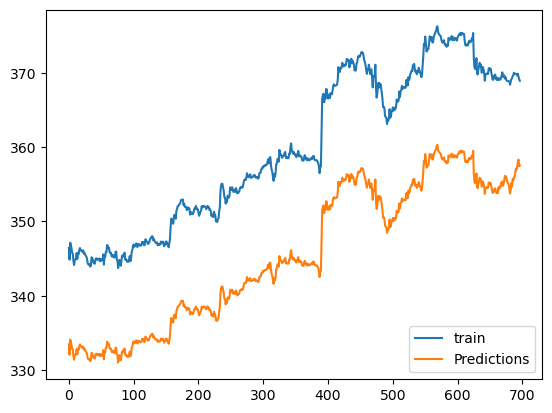

[[3.60250293 3.37751733 3.69973638 ... 6.00025176 5.98019446 5.95719134]
 [3.79359828 3.58064015 3.88605326 ... 6.11689315 6.09721957 6.0746596 ]
 [3.51268975 3.28155226 3.61234152 ... 5.94676241 5.92652409 5.90331183]
 ...
 [3.45083086 3.67132642 3.34637291 ... 3.3341806  3.29794858 3.25605093]
 [3.31644996 3.54531302 3.2076188  ... 3.4678745  3.43305377 3.39282493]
 [3.33724543 3.56477364 3.22911521 ... 3.447867   3.41284214 3.3723722 ]]


In [113]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [114]:
final_pred

array([333.45196533, 332.03860474, 334.09100342, 333.86599731,
       333.40698242, 332.84899902, 332.78598022, 331.89047241,
       331.39099121, 332.00476074, 331.99398804, 332.20098877,
       332.83096313, 332.12915039, 332.87597656, 332.71395874,
       333.19998169, 333.44299316, 333.22695923, 333.14147949,
       333.01098633, 333.14596558, 333.14605713, 332.76800537,
       332.88497925, 332.65997314, 332.50473022, 332.38546753,
       332.15597534, 331.59796143, 331.45397949, 331.40249634,
       331.49716187, 331.19299316, 331.30996704, 332.32696533,
       332.23696899, 332.01196289, 331.68798828, 331.58895874,
       331.53945923, 332.03897095, 332.20996094, 332.14697266,
       332.01196289, 332.12896729, 332.065979  , 332.18432617,
       331.84997559, 332.11773682, 331.89498901, 332.02996826,
       331.99398804, 332.67797852, 331.43597412, 332.41247559,
       332.37646484, 332.97949219, 332.95147705, 333.81646729,
       333.677948  , 333.43118286, 333.46096802, 332.88